### These are the naive bayes algorithm available in sklearn 
All naive bayes algorithm will be available inside the<br>
**sklearn.naive_bayes** 

#### Following the naive bayes algorithm will available inside the naive_bayes
* GaussianNB: - When we have standard continuous variable
* BernoulliNB: - When we have binary features
* CategoricalNB: - When we have categorical variables
* MultinomialNB: - When we have multinomial vairable
* ComplementNB: - When there is data imbalance inside the dataset

In [1]:
import numpy as np
from pprint import pprint

np.random.seed(42)

from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import SGDClassifier, RidgeClassifier, LogisticRegression
from sklearn.model_selection import cross_validate, RandomizedSearchCV, cross_val_predict

from sklearn.metrics import log_loss
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, classification_report

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, roc_auc_score

from scipy.stats import loguniform
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
mpl.rc('axes', labelsize= 14)
mpl.rc('xtick', labelsize= 12)
mpl.rc('ytick', labelsize= 12)
mpl.rc('figure', figsize= (8, 6))

In [3]:
def warn(*args, **kwargs):
    pass
import warnings 
warnings.warn = warn

### Handwritten Digit Classification
* we are going to use LogisticRegression (Despite it's name) to classify (recognize) given digit image. Again, we first apply the model for binary classification and then extend it to multiclass classification.

* Suppose we want to recognize whether the given image is to of digit zero or not (digit other than zero). Then the problem could be cast as binary classification problem.

In [4]:
from sklearn.datasets import fetch_openml
x_pd, y_pd = fetch_openml('mnist_784', version= 1, return_X_y= True)

In [5]:
X = x_pd.to_numpy()
y = y_pd.to_numpy()

In [6]:
X = MinMaxScaler().fit_transform(X)


In [7]:
print('Mean of the features', np.mean(X))
print('Standard derivation:', np.std(X))
print('Max value of the dataset is:', np.max(X))
print('Min value of the dataset is:', np.min(X))


Mean of the features 0.13092720382627604
Standard derivation: 0.3084510570135976
Max value of the dataset is: 1.0
Min value of the dataset is: 0.0


In [8]:
target_names = np.unique(y)
print('Number of samples is:', X.shape[0], ' and type is: ', y.dtype)
print('Number of features is: ', X.shape[1])
print("Number of classes is:", len(target_names))
print('The main labels are: ', target_names)

Number of samples is: 70000  and type is:  object
Number of features is:  784
Number of classes is: 10
The main labels are:  ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']


#### data visualization

type of axis is: <class 'numpy.ndarray'>


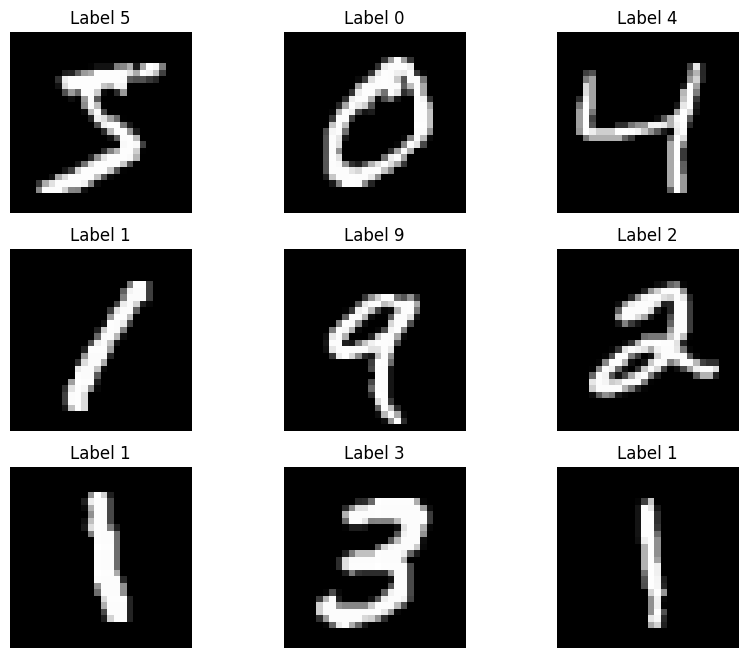

In [9]:
num_img = 9 # usually we take this number as square of some digit
factor = int(np.sqrt(num_img))
subplot, ax = plt.subplots(nrows= factor, ncols= factor, figsize= (10, 8)) # Creating a subplot instance for displaying multiple images in the same set
print('type of axis is:', type(ax))
for i in range(factor): # starting initial loop
    index = i * factor # index count
    for j in range(factor): # column count
        ax[i, j].imshow(X[index + j].reshape(28, 28), cmap= 'gray') # imshow function is used to print the images out of an array 
        '''
            Here we are taking the array index at location and reshaping it with 28 X 28 then representing it as image
            imshow function converts and array to image 
            camp will change the standad blue yellow color to black and white color
        '''
        ax[i, j].set_title('Label {0}'.format(y[index + j])) # this will set the label of subplot
        ax[i, j].set_axis_off() # this will turn off the axis labels from the images

In [10]:
x_train, x_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]


<Axes: ylabel='Count'>

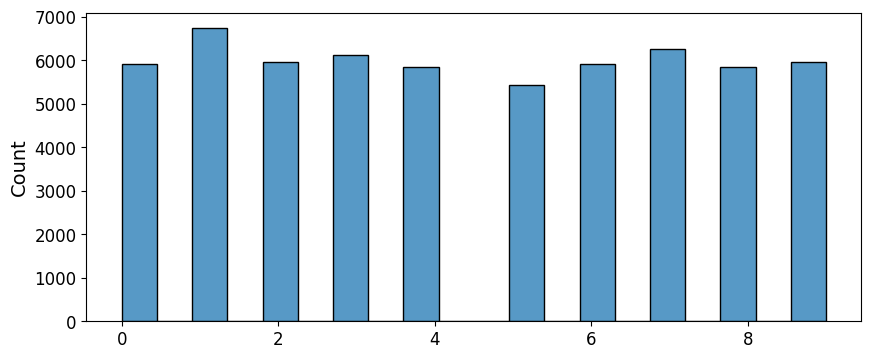

In [11]:
plt.figure(figsize=(10, 4))
# print(y_train[:5])
sns.histplot(data= np.int8(y_train), binwidth= 0.45)

In [12]:
## changing labels from y_train_0 and y_train
y_train_0 = np.full(len(y_train), -1)
y_test_0 = np.full(len(y_test), -1)
# print('type of y_train_0', type(y_train_0))
index_0 = np.where(y_train == '0')
y_train_0[index_0] = 1

index_0 = np.where(y_test == '0')
y_test_0[index_0] = 1


In [13]:
np.unique(y_test_0) # sanity check for this

array([-1,  1])

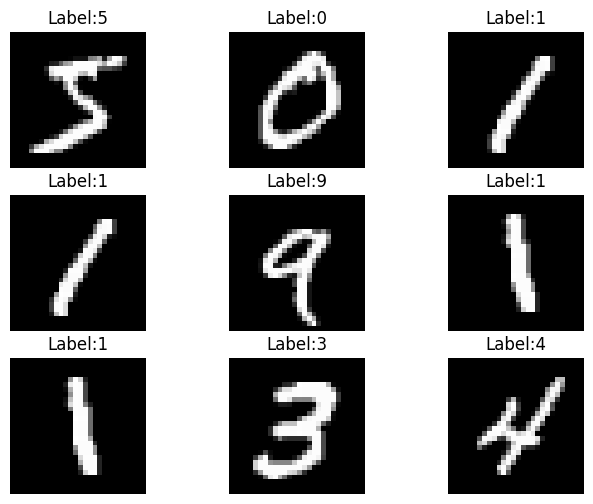

In [14]:
num_img = 9
factor = int(np.sqrt(num_img))
fig, ax = plt.subplots(nrows= factor, ncols= factor, figsize=(8, 6))
for i in range(factor):
    index = i * factor
    for j in range(factor):
        index = index + j
        ax[i, j].imshow(X[index].reshape(-1, 28), cmap= 'gray')
        ax[i, j].set_title('Label:{0}'.format(str(y_train[index])))
        ax[i, j].set_axis_off()



In [15]:
num_pos = len(np.where(y_train_0 == 1)[0])
num_neg = len(np.where(y_train_0 == -1)[0])
print(num_pos, num_neg)


5923 54077


In [16]:
base_clf = DummyClassifier(strategy='most_frequent')
base_clf.fit(x_train, y_train_0)
print(base_clf.score(x_train, y_train_0))

0.9012833333333333


### Testing new classification for logistic regression model


In [17]:
bin_sgd_clf = SGDClassifier(loss= 'log_loss', penalty= 'l2', 
                            max_iter= 1,
                            warm_start= True,
                            eta0= 0.01,
                            alpha= 0,
                            learning_rate= 'constant', 
                            random_state= 1729)
Loss = []
iterations = 100
for i in range(iterations):
    bin_sgd_clf.fit(x_train, y_train_0)
    y_pred = bin_sgd_clf.predict_proba(x_train)
    Loss.append(log_loss(y_train_0, y_pred))
    


In [18]:
import sklearn
print(sklearn.__version__)

1.3.2


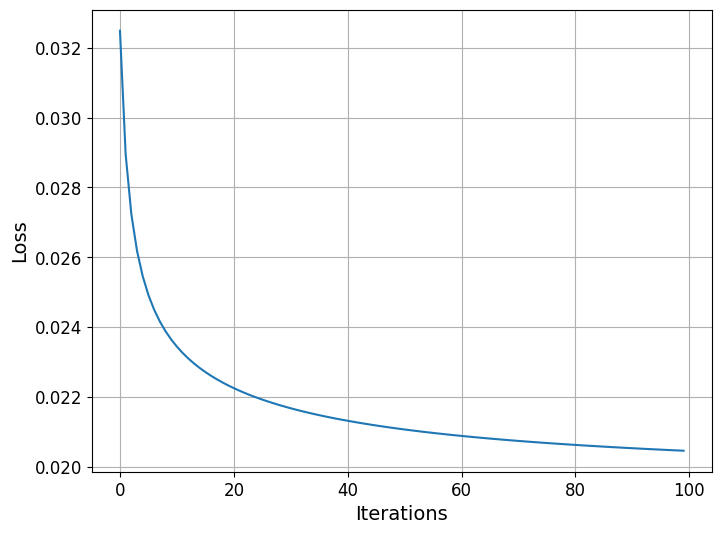

In [19]:
plt.figure()
plt.plot(np.arange(iterations), Loss)
plt.grid(True)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

In [22]:
print('Training accuracy is: %.2f' % bin_sgd_clf.score(x_train, y_train_0))
print('Test accuracy is: %.2f' % bin_sgd_clf.score(x_test, y_test_0))

Training accuracy is: 0.99
Test accuracy is: 0.99


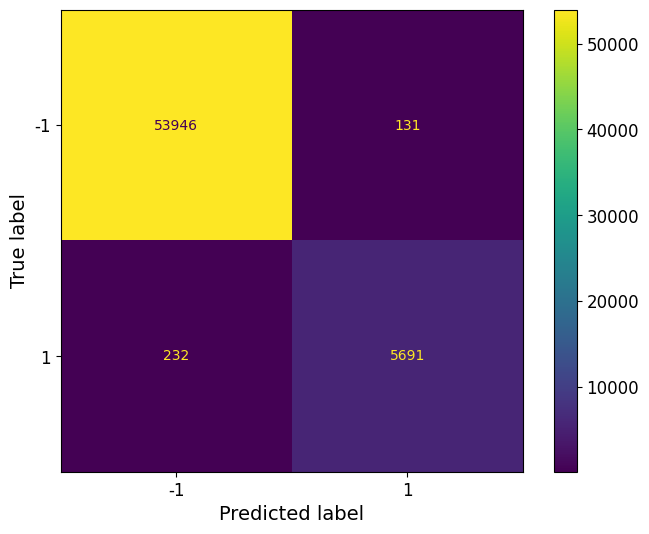

In [23]:
y_hat_train_0 = bin_sgd_clf.predict(x_train)
confusion_matrix_display = ConfusionMatrixDisplay.from_predictions(y_train_0, y_hat_train_0)
plt.show()

In [25]:
print('Classification report is:')
cs_report = classification_report(y_train_0, y_hat_train_0)
print(cs_report)

Classification report is:
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00     54077
           1       0.98      0.96      0.97      5923

    accuracy                           0.99     60000
   macro avg       0.99      0.98      0.98     60000
weighted avg       0.99      0.99      0.99     60000



In [26]:
sgd_estimator = SGDClassifier(loss= 'log_loss', penalty= 'l2', 
                              max_iter= 100, warm_start= False, 
                              eta0= 0.01, alpha= 0, learning_rate= 'constant',
                              random_state= 1729)

cv_bin_clf = cross_validate(sgd_estimator, x_train, y_train_0,
                            return_estimator= True, return_train_score= True,
                            scoring= ['precision', 'recall', 'f1'])
pprint(cv_bin_clf)

{'estimator': [SGDClassifier(alpha=0, eta0=0.01, learning_rate='constant', loss='log_loss',
              max_iter=100, random_state=1729),
               SGDClassifier(alpha=0, eta0=0.01, learning_rate='constant', loss='log_loss',
              max_iter=100, random_state=1729),
               SGDClassifier(alpha=0, eta0=0.01, learning_rate='constant', loss='log_loss',
              max_iter=100, random_state=1729),
               SGDClassifier(alpha=0, eta0=0.01, learning_rate='constant', loss='log_loss',
              max_iter=100, random_state=1729),
               SGDClassifier(alpha=0, eta0=0.01, learning_rate='constant', loss='log_loss',
              max_iter=100, random_state=1729)],
 'fit_time': array([1.140311  , 1.09120107, 1.06157231, 1.19523191, 0.99696684]),
 'score_time': array([0.04063702, 0.04508281, 0.04130054, 0.04411864, 0.04597521]),
 'test_f1': array([0.95699831, 0.954371  , 0.9616041 , 0.95870583, 0.95993252]),
 'test_precision': array([0.95538721, 0.96382429, 0.

In [30]:
weights = bin_sgd_clf.coef_
bias = bin_sgd_clf.intercept_
print('Dimension of weights are:', weights.shape)
print('Bias:', bias)

Dimension of weights are: (1, 784)
Bias: [-4.89282893]


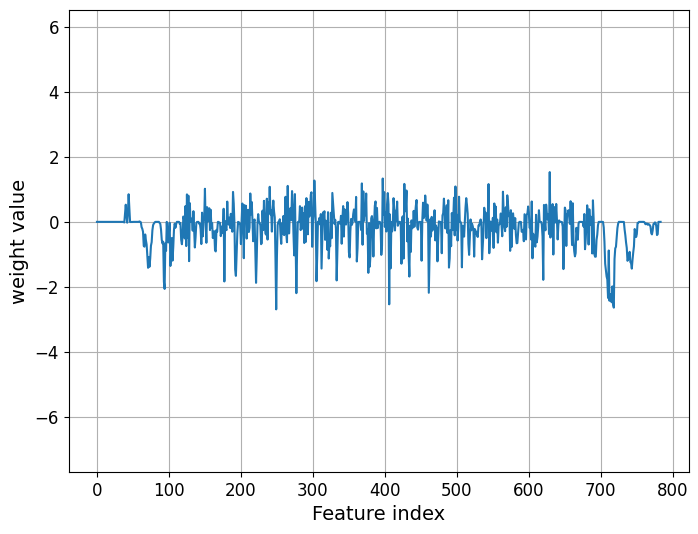

In [32]:
plt.figure()
plt.plot(np.arange(0, 784), weights[0, :])
plt.xlabel('Feature index')
plt.ylabel('weight value')
plt.ylim((np.min(weights) -5, np.max(weights) + 5))
plt.grid(True)

#### Taking regularizer for removing unwanted weights vectors

In [34]:
bin_sgd_clf_l2 = SGDClassifier(loss= 'log_loss', penalty= 'l2',
                               alpha= 0.001, max_iter= 1, warm_start= True,
                               eta0= 0.01, learning_rate= 'constant', random_state= 1729)

Loss_with_l2 = []
for i in range(iterations):
    bin_sgd_clf_l2.fit(x_train, y_train_0)
    y_pred = bin_sgd_clf_l2.predict_proba(x_train)
    Loss_with_l2.append(log_loss(y_train_0, y_pred))



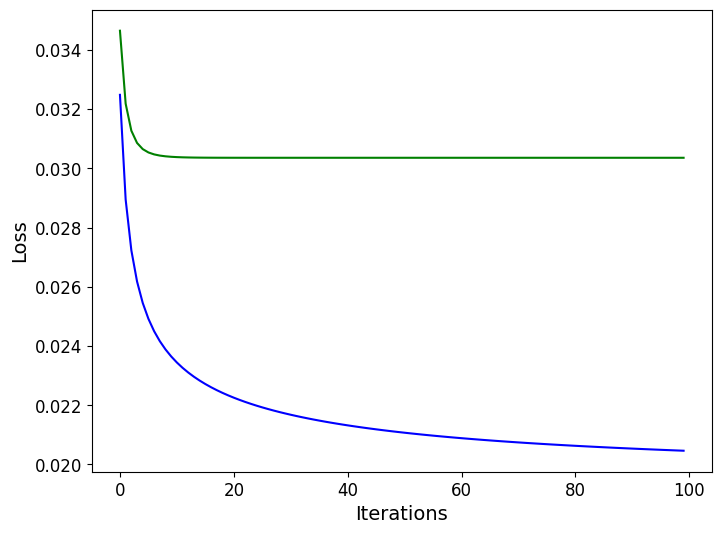

In [37]:
Loss = Loss[:100]
plt.figure()
plt.plot(np.arange(iterations), Loss_with_l2, color= 'green')
plt.plot(np.arange(iterations), Loss, color= 'blue')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

#### applying random search cv

In [42]:
lr_grid = loguniform(1e-2, 1e-1)

In [43]:
print(lr_grid.rvs(3, random_state= 42))

[0.02368864 0.0892718  0.05395031]


In [45]:
estimator_with_l2_uniform = SGDClassifier(loss='log_loss', penalty= 'l2', 
                                          max_iter=1, warm_start= True, learning_rate= 'constant',
                                          eta0= 0.01, alpha= 0, random_state= 1729)




In [46]:
scores = RandomizedSearchCV(estimator_with_l2_uniform, param_distributions= {'eta0': lr_grid},
                            cv= 5, scoring=['precision', 'recall', 'f1'],
                            n_iter= 5, refit= 'f1')


In [47]:
scores.fit(x_train, y_train_0)

RandomizedSearchCV(cv=5,
                   estimator=SGDClassifier(alpha=0, eta0=0.01,
                                           learning_rate='constant',
                                           loss='log_loss', max_iter=1,
                                           random_state=1729, warm_start=True),
                   n_iter=5,
                   param_distributions={'eta0': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7f29991c20b0>},
                   refit='f1', scoring=['precision', 'recall', 'f1'])

In [49]:
pprint(scores.cv_results_)

{'mean_fit_time': array([0.274579  , 0.26210256, 0.26372256, 0.25888505, 0.26659641]),
 'mean_score_time': array([0.04084725, 0.03918796, 0.04079256, 0.04223967, 0.04132833]),
 'mean_test_f1': array([0.95383975, 0.94148246, 0.94869555, 0.95090017, 0.95474878]),
 'mean_test_precision': array([0.96136672, 0.93597638, 0.94998271, 0.9540212 , 0.96640269]),
 'mean_test_recall': array([0.94682062, 0.94851138, 0.94834146, 0.94850966, 0.94361173]),
 'param_eta0': masked_array(data=[0.023688639503640783, 0.08927180304353628,
                   0.05395030966670229, 0.03968793330444373,
                   0.014322493718230255],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object),
 'params': [{'eta0': 0.023688639503640783},
            {'eta0': 0.08927180304353628},
            {'eta0': 0.05395030966670229},
            {'eta0': 0.03968793330444373},
            {'eta0': 0.014322493718230255}],
 'rank_test_f1': array([2, 5, 4, 3, 1], dtype=int32)

In [50]:
best_estimator = scores.best_estimator_
y_hat_train_best_0 = best_estimator.predict(x_train)
print(classification_report(y_train_0, y_hat_train_best_0))


              precision    recall  f1-score   support

          -1       0.99      1.00      0.99     54077
           1       0.98      0.92      0.95      5923

    accuracy                           0.99     60000
   macro avg       0.99      0.96      0.97     60000
weighted avg       0.99      0.99      0.99     60000



#### Classification Report
**Precision/Recall Tradeoff**

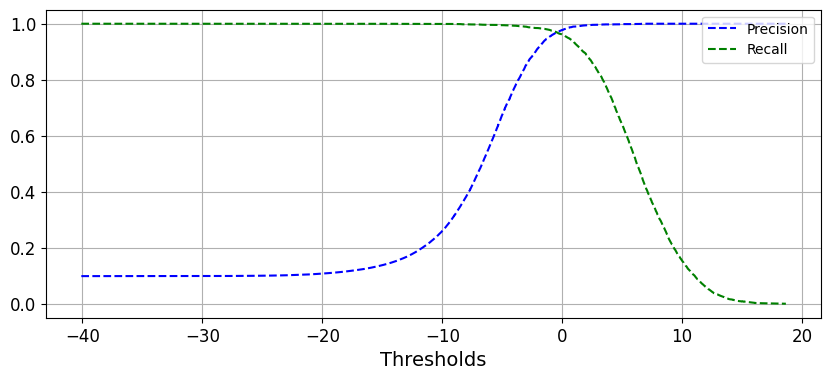

In [57]:
y_scores = bin_sgd_clf.decision_function(x_train)
precision, recall, threshols = precision_recall_curve(y_train_0, y_scores)
plt.figure(figsize=(10, 4))
plt.plot(threshols, precision[:-1], 'b--', label= 'Precision')
plt.plot(threshols, recall[:-1], 'g--', label= 'Recall')
plt.xlabel('Thresholds')
plt.grid(True)
plt.legend(loc= 'upper right')
plt.show()


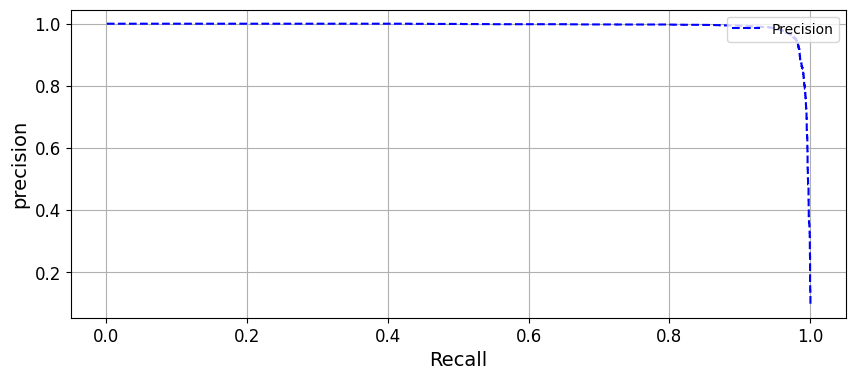

In [58]:
plt.figure(figsize=(10, 4))
plt.plot(recall[:-1], precision[:-1], 'b--', label= 'Precision')
plt.xlabel('Recall')
plt.ylabel('precision')
plt.grid(True)
plt.legend(loc= 'upper right')
plt.show()

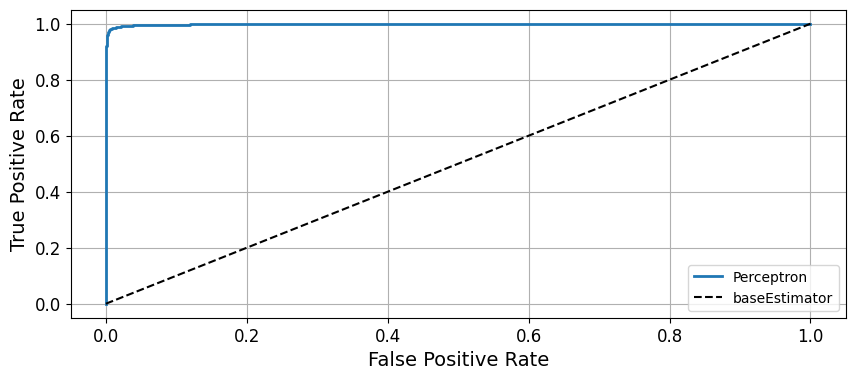

In [60]:
fpr, tpr, thresholds = roc_curve(y_train_0, y_scores)
plt.figure(figsize=(10, 4))
plt.plot(fpr, tpr, linewidth= 2, label= 'Perceptron')
plt.plot([0, 1], [0,1], 'k--', label= 'baseEstimator')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.legend()
plt.show()